#### The Royalty Gold Corporation prospects for undiscovered gold deposits around the world. The company is currently investigating a possible site on the island of Milos off the coast of Greece in the Mediterranean. When prospecting, the company drills to collect soil and rock samples and then analyzes the chemical properties of the samples to help determine whether or not the site is likely to contain significant gold deposits. Gold-bearing ore is made up of various minerals including calaverite, sylvanite, and petzite. Sites with higher concentrations of these minerals are more likely to contain significant gold deposits. The file RoyalGold.xlsm represents the average levels of calaverite, sylvanite, and petzite in samples collected from previous various sites examined in previous prospecting expeditions. These data are grouped according to whether or not significant gold deposits were found at the location (1=significant, 2=insignificant).



#### a. Partition the data into a training set (with 60% of the observations) and validation set (with 40% of the observations)

#### b. Use the k-nearest neighbor technique to create a classifier for this data with normalized inputs. What value of k seems to work best? How accurate is this procedure on the training and validation data sets?

#### c. Use a single classification tree to create a classifier for this data with at least 5 observations per terminal node, and the maximum tree depth to 5. Create a graphic depiction of the tree using the validation data. How accurate is this procedure on the training and validation data sets?

#### d. Compare the kNN and Decision Tree and comment on the accuracy of these methods.


In [1]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\nitis\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\nitis\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
# Importing required libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import preprocessing
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm

import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score #, BIC_score

In [4]:
df = pd.read_excel('Datasets/RoyalGold.xlsm', header=1)

In [5]:
print(df.columns)

Index(['Group', 'Calaverite', 'Sylvanite', 'Petzite'], dtype='object')


In [6]:
print(df.head())

   Group  Calaverite  Sylvanite  Petzite
0      1       0.038      0.041    0.037
1      1       0.058      0.089    0.028
2      1       0.061      0.073    0.029
3      1       0.063      0.059    0.039
4      1       0.064      0.062    0.050


In [7]:
df.head()

,Group,Calaverite,Sylvanite,Petzite
0,1,0.038,0.041,0.037
1,1,0.058,0.089,0.028
2,1,0.061,0.073,0.029
3,1,0.063,0.059,0.039
4,1,0.064,0.062,0.050


In [8]:
# Define outcome and predictors
outcome = 'Group'
predictors = ['Calaverite', 'Sylvanite', 'Petzite']

In [9]:
# Partition data
train_df, valid_df = train_test_split(df, test_size=0.4, random_state=1)
print('Training set:', train_df.shape, 'Validation set:', valid_df.shape)

Training set: (54, 4) Validation set: (36, 4)


In [10]:
# Normalize data
scaler = StandardScaler()
scaler.fit(train_df[predictors])
train_X = scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]

In [11]:
# k-NN using k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=1)

In [12]:
# Train a classifier for different values of k
results = []
for k in range(1, 20, 1):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'training_accuracy': accuracy_score(train_y, knn.predict(train_X)),
        'validation_accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results

,k,training_accuracy,validation_accuracy
0,1,1.000000,0.666667
1,2,0.925926,0.666667
2,3,0.944444,0.805556
3,4,0.944444,0.722222
4,5,0.925926,0.888889
5,6,0.907407,0.888889
6,7,0.907407,0.861111
7,8,0.925926,0.888889
8,9,0.925926,0.888889
9,10,0.925926,0.888889


In [13]:
# k = 5 is the best value

In [14]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(train_X, train_y)

KNeighborsClassifier()

In [15]:
# k-NN model for k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)

knnPredOpt = knn.predict(train_X)
print(confusion_matrix(train_y, knnPredOpt))
print('Train Accuracy :', accuracy_score(train_y, knnPredOpt))

knnPredOpt = knn.predict(valid_X)
print(confusion_matrix(valid_y, knnPredOpt))
print('Validation Accuracy :', accuracy_score(valid_y, knnPredOpt))

[[25  4]
 [ 0 25]]
Train Accuracy : 0.9259259259259259
[[12  4]
 [ 0 20]]
Validation Accuracy : 0.8888888888888888


In [16]:
y = 'Group'
predictors = ['Calaverite', 'Sylvanite', 'Petzite']
X = df[predictors]

In [17]:
train_X, valid_X, train_y, valid_y = train_test_split(X, df[y], test_size=0.4, random_state=1)

model2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=5, random_state=1)
model2.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1)

In [18]:
classificationSummary(train_y, model1.predict(train_X))
classificationSummary(valid_y, model1.predict(valid_X))

Confusion Matrix (Accuracy 0.4630)

       Prediction
Actual  0  1
     0  0 29
     1  0 25
Confusion Matrix (Accuracy 0.5556)

       Prediction
Actual  0  1
     0  0 16
     1  0 20


C:\Users\nitis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\nitis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


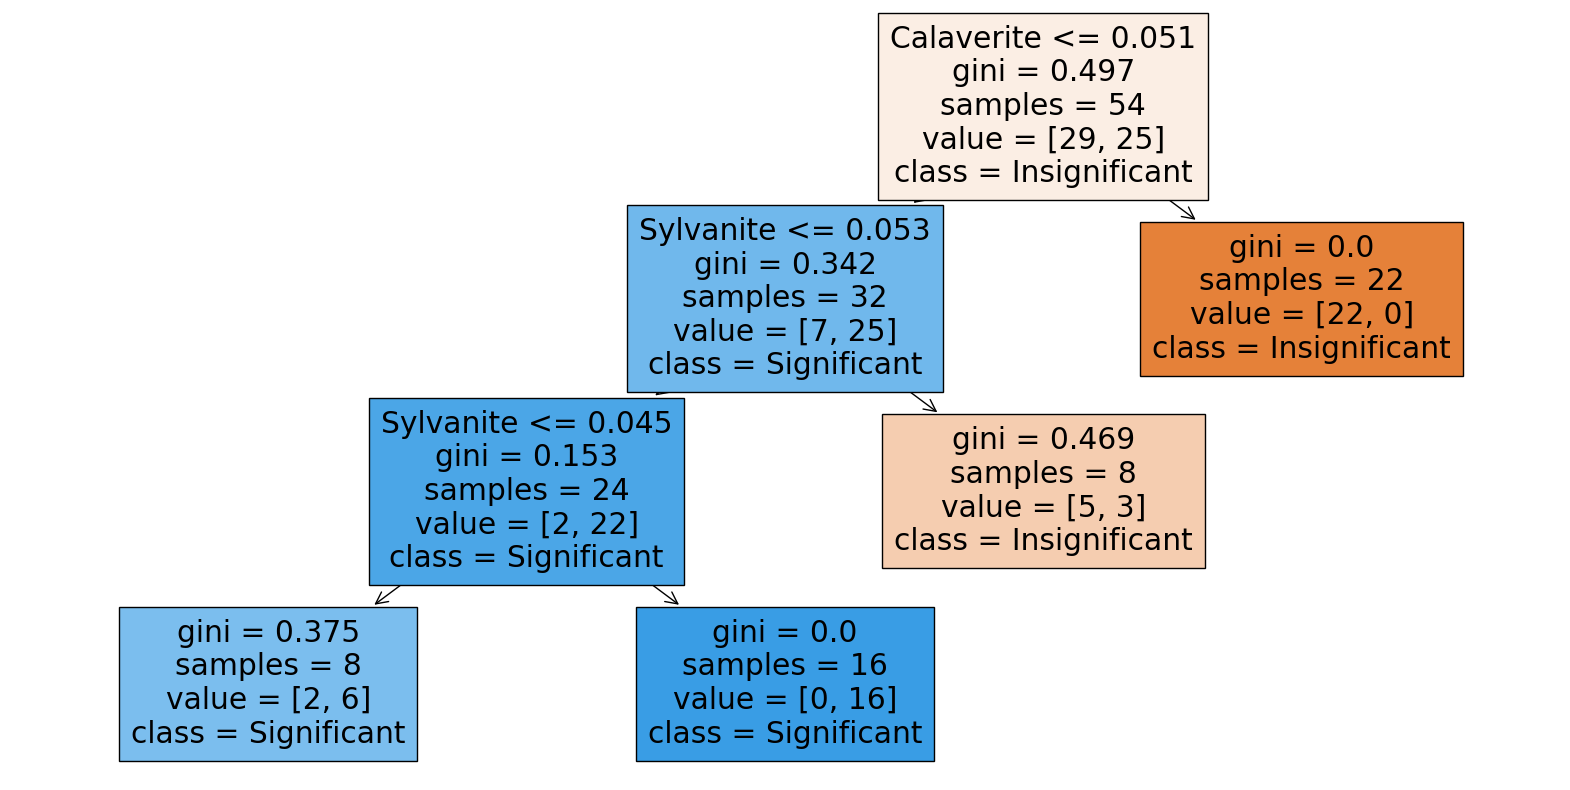

In [19]:
from sklearn.tree import plot_tree

# Assume 'tree_model' is the trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))
plot_tree(model2, feature_names=predictors, class_names=['Insignificant', 'Significant'], filled=True)
plt.show()

In [20]:
# Compare the models
print('k-NN Accuracy on Validation set:', results[results['k'] == 5]['validation_accuracy'].values[0])
print('Decision Tree Accuracy on Validation set:', accuracy_score(valid_y, model2.predict(valid_df[predictors])))

k-NN Accuracy on Validation set: 0.8888888888888888
Decision Tree Accuracy on Validation set: 0.8333333333333334
